# **DS - 3001 Final Project: A Look into Healthcare System Capacity**
#### Amanda Lin, Courtney Nguyen, Cole Blanton, Emaan Qillawala

## **Background:** 
##### This data was gathered from CovidCareMap.org, which is an organization that was tracking the U.S. healthcare system resource capacity for handling the COVID pandemic. The particular data set looking at the healthcare capacity by county in the U.S. could help the national government understand which geographic locations are overwhelmed by the demands of the pandemic (as seen by their high bed occupancy rates) and determine where to allocate financial support and additional clinical supplies/resources. Additionally, breaking the data down by population, the model created could help elucidate which areas in the U.S. are relatively dealing with more severe cases of COVID and therefore have higher bed occupancy rates.

##### We found that this question was extremely relevant to how the U.S. overall was able to manage the COVID pandemic and associated deaths. In a research article published in [BMJ](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8852235/), it was found that bed occupancy rate was significantly correlated with inpatient mortality during the COVID pandemic. 

## **Research Question:** 
##### The CDC must determine the national healthcare system’s capacity to handle the COVID-19 pandemic and its severity. They would like to determine whether or not a county’s healthcare system capacity (the number of occupied beds) is at high occupancy (seen at 0.7 or more) based on county population, state, number of staffed beds per 1000 people, licensed all beds, etc.


## **Data Source:**

##### Healthcare System Capacity by County from CovidCareMap

[CovidCareMap Data Source](https://github.com/covidcaremap/covid19-healthsystemcapacity/blob/master/data/published/us_healthcare_capacity-county-CovidCareMap.csv)

## **Exploratory Data Analysis:**

##### **Target Variable** = All bed occupancy rate, classification variable

##### **Load the Data:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.calibration import LabelEncoder
from sklearn.metrics import confusion_matrix

In [2]:
covid = pd.read_csv("us_healthcare_capacity-county-CovidCareMap.csv")
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   fips_code                                   2537 non-null   int64  
 1   State                                       2537 non-null   object 
 2   County Name                                 2537 non-null   object 
 3   Staffed All Beds                            2537 non-null   float64
 4   Staffed ICU Beds                            2537 non-null   float64
 5   Licensed All Beds                           2537 non-null   float64
 6   All Bed Occupancy Rate                      2460 non-null   float64
 7   ICU Bed Occupancy Rate                      1410 non-null   float64
 8   Population                                  2537 non-null   float64
 9   Population (20+)                            2537 non-null   float64
 10  Population (

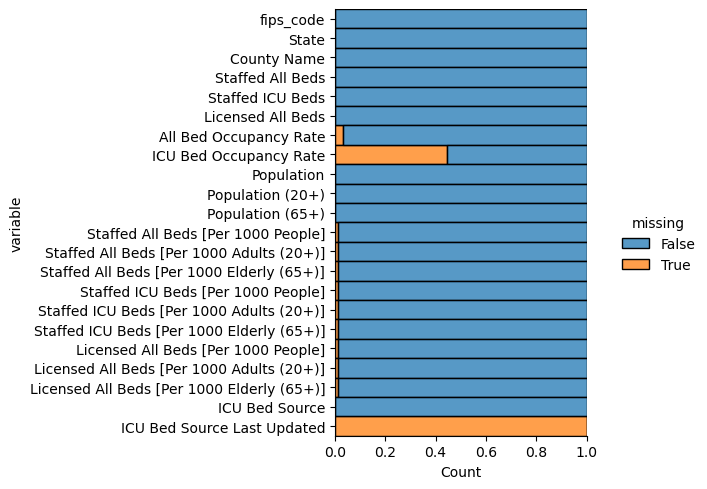

In [3]:
sns.displot(data = covid.isna().melt(value_name = 'missing'),
   y = 'variable', hue = "missing", multiple = "fill", aspect = 1.25)

##### **Clean Data:** 
Drop unnecessary variables and drop values with N/As 

In [4]:
covid = covid.drop(columns=['Staffed ICU Beds', 'ICU Bed Occupancy Rate', 'Staffed ICU Beds [Per 1000 People]', 'Staffed ICU Beds [Per 1000 Adults (20+)]', 'Staffed ICU Beds [Per 1000 Elderly (65+)]','ICU Bed Source', 'ICU Bed Source Last Updated'])
covid = covid.dropna()

##### **Checking the Compesition of the Data:** 

In [5]:
covid.head()

,fips_code,State,County Name,Staffed All Beds,Licensed All Beds,All Bed Occupancy Rate,Population,Population (20+),Population (65+),Staffed All Beds [Per 1000 People],Staffed All Beds [Per 1000 Adults (20+)],Staffed All Beds [Per 1000 Elderly (65+)],Licensed All Beds [Per 1000 People],Licensed All Beds [Per 1000 Adults (20+)],Licensed All Beds [Per 1000 Elderly (65+)]
1,2020,AK,Anchorage,979.0,1149.0,0.66,291538.0,213508.0,32333.0,3.358,4.585,30.279,3.941,5.382,35.536
2,2050,AK,Bethel,34.0,37.0,0.40,18216.0,11082.0,1402.0,1.866,3.068,24.251,2.031,3.339,26.391
3,2070,AK,Dillingham,18.0,18.0,0.15,5000.0,3278.0,470.0,3.600,5.491,38.298,3.600,5.491,38.298
4,2090,AK,Fairbanks North Star,145.0,175.0,0.46,98971.0,72505.0,10204.0,1.465,2.000,14.210,1.768,2.414,17.150
5,2110,AK,Juneau,45.0,73.0,0.41,32113.0,24525.0,4298.0,1.401,1.835,10.470,2.273,2.977,16.985


In [6]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 1 to 2536
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   fips_code                                   2436 non-null   int64  
 1   State                                       2436 non-null   object 
 2   County Name                                 2436 non-null   object 
 3   Staffed All Beds                            2436 non-null   float64
 4   Licensed All Beds                           2436 non-null   float64
 5   All Bed Occupancy Rate                      2436 non-null   float64
 6   Population                                  2436 non-null   float64
 7   Population (20+)                            2436 non-null   float64
 8   Population (65+)                            2436 non-null   float64
 9   Staffed All Beds [Per 1000 People]          2436 non-null   float64
 10  Staffed All 

##### During exploratory analysis of the data, we learned that the data is majority numerical, aside from the state and county names. There were only two variables missing more than 10% of their data (ICU bed occupancy rate, ICU bed source last updated), so they were dropped. Additionally, NA values and the ICU related variables were dropped because they were not relevant to this analysis. 

##### **Value Counts of Counties per State:** 

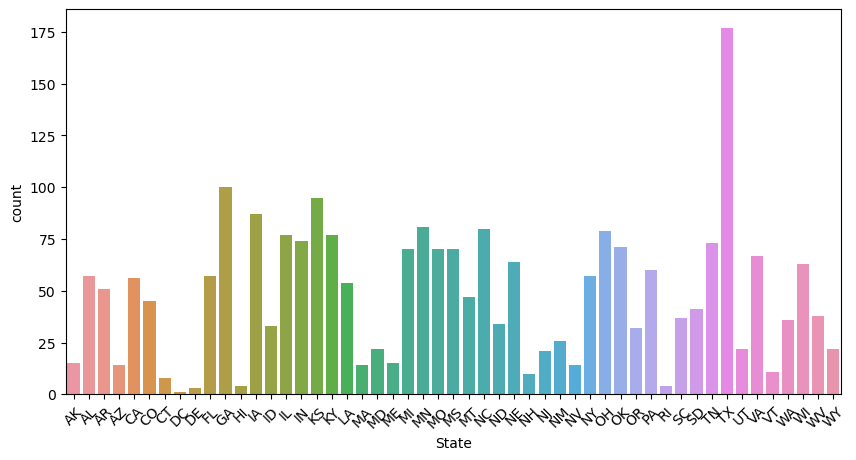

In [7]:
plt.figure(figsize=(10, 5))
chart = sns.countplot( data=covid, x='State')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

##### Some states are more represented than others in the data set due to them having more counties. This should not greatly influence the outcomes of the machine learning model. 

##### **All Bed Occupancy 5 Number Summary Box Plot :** 

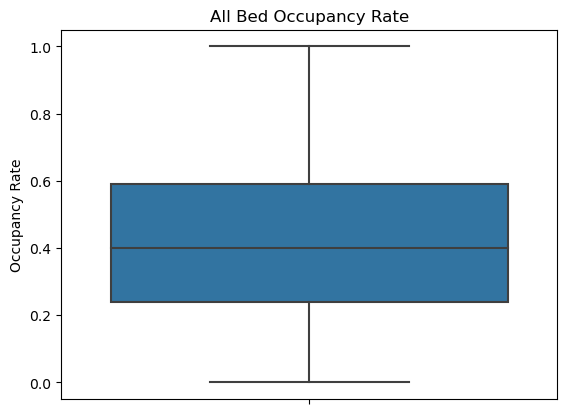

In [8]:
sns.boxplot(y='All Bed Occupancy Rate', data=covid)

plt.title('All Bed Occupancy Rate')
plt.ylabel('Occupancy Rate')
plt.show()

##### The target variable is all bed occupancy rate. We decided to convert the percentages into a classification variable of high, middle, and low bed occupancy. 0-0.4 was considered low occupancy, 0.41-0.70 middle occupancy, and 0.71+ as high occupancy. Although according to the [National Institutes of Health](https://pubmed.ncbi.nlm.nih.gov/25006151/) high bed occupancy is considered 0.85, we lowered this value to account for the vast differences in population, healthcare access, and more across the country. 

##### This box plot indicates that 75% of the observations have an occupancy rate below 0.6, and the median is 0.4. We utilized these results to create our ranges for low, middle, and high bed occupancy for the target variable. Looking at the value counts, a majority of the observations are in the middle occupancy rate range.

##### **Convert Target Variable Into a Categorical Variable by Using Lambda Threshold:** 

In [9]:
covid['All Bed Occupancy Rate'] = covid['All Bed Occupancy Rate'].apply(
    lambda x: 'high occupancy' if x > 0.60
    else ('middle occupancy' if x > 0.25
          else 'low occupancy')
)

covid['All Bed Occupancy Rate'].astype('object')

1         high occupancy
2       middle occupancy
3          low occupancy
4       middle occupancy
5       middle occupancy
              ...       
2532       low occupancy
2533    middle occupancy
2534    middle occupancy
2535    middle occupancy
2536    middle occupancy
Name: All Bed Occupancy Rate, Length: 2436, dtype: object

In [10]:
covid['All Bed Occupancy Rate'].value_counts()

middle occupancy    1231
low occupancy        656
high occupancy       549
Name: All Bed Occupancy Rate, dtype: int64

##### **Value Counts of Categorized All Bed Occupancy Rate:** 

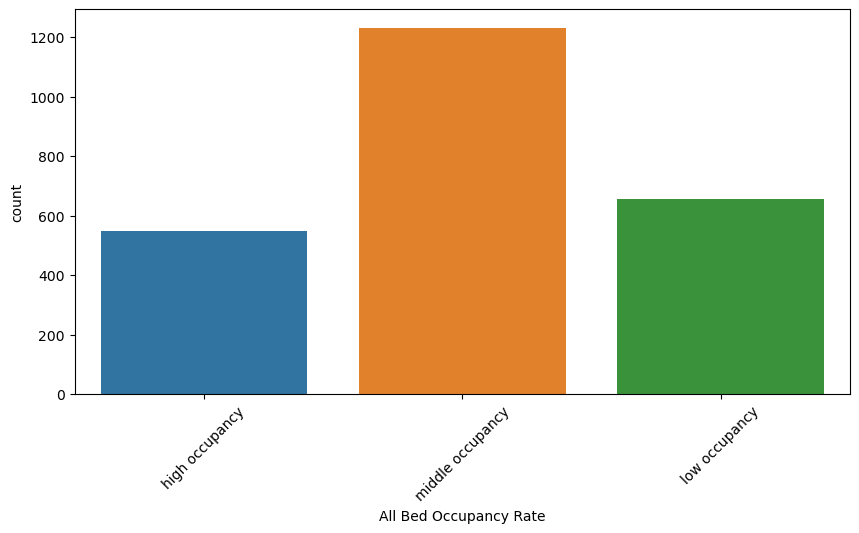

In [11]:
plt.figure(figsize=(10, 5))
chart = sns.countplot(data=covid, x='All Bed Occupancy Rate')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

##### **Describe all of the Variables**

In [12]:
covid.describe()

,fips_code,Staffed All Beds,Licensed All Beds,Population,Population (20+),Population (65+),Staffed All Beds [Per 1000 People],Staffed All Beds [Per 1000 Adults (20+)],Staffed All Beds [Per 1000 Elderly (65+)],Licensed All Beds [Per 1000 People],Licensed All Beds [Per 1000 Adults (20+)],Licensed All Beds [Per 1000 Elderly (65+)]
count,2436.000000,2436.000000,2436.000000,2.436000e+03,2.436000e+03,2.436000e+03,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000
mean,30149.147373,332.106322,428.863711,1.296366e+05,9.711367e+04,2.064483e+04,2.665162,3.547758,14.597846,3.453977,4.594261,18.994130
std,14947.143726,1003.550685,1279.834426,3.747552e+05,2.809996e+05,5.350184e+04,2.417202,3.175213,12.894066,3.906481,5.076848,20.905135
min,1001.000000,2.000000,0.000000,1.087000e+03,8.800000e+02,2.540000e+02,0.092000,0.128000,0.493000,0.000000,0.000000,0.000000
25%,19032.000000,25.000000,25.000000,1.550450e+04,1.171075e+04,3.064000e+03,1.291000,1.710500,6.940500,1.588000,2.113750,8.511000
50%,29114.000000,50.000000,76.000000,3.563350e+04,2.688050e+04,6.643500e+03,2.038500,2.720500,11.203000,2.626500,3.506000,14.336000
75%,42089.500000,209.000000,272.250000,9.681875e+04,7.229200e+04,1.637425e+04,3.138000,4.210000,17.792750,4.081500,5.441500,22.717250
max,56045.000000,23071.000000,27400.000000,1.010552e+07,7.658126e+06,1.375957e+06,30.373000,39.077000,155.666000,97.226000,120.423000,463.326000


##### The five number summary for the numerical observations helps us visualize the vast differences between the variables. We normalized the numerical values to improve the models’ efficiency. 

## **Fairness Assessment**

##### **Elderly Population Present in Each County**

##### We conducted a fairness assessment on the county population ages in order to protect the elderly populations in these locations. We know that elderly patients are more susceptible to developing severe cases of COVID due to their weaker immune systems, which may lead them to a higher risk of becoming hospitalized. Determining the elderly population present in the total population in each county will help us determine if ageism could potentially impact the support a county’s healthcare system receives for their high bed occupancy rate. A large elderly population could lead to less funding/resources given to a healthcare system due to attributing symptoms to old age. This has been reported as a prevalent issue in the healthcare field by many hospitals, including [Cedars Sinai Medical Center](https://www.cedars-sinai.org/blog/confronting-ageism-in-healthcare.html#:~:text=Ageism%20can%20manifest%20as%20ignoring,of%20aging%2C%E2%80%9D%20Rosen%20said). We considered an elderly contribution of 40% towards a county's overall population as high. 

1. New column with elderly population percentage
2. Convert to classification variable -> over 0.4 is concerning
3. Determine value counts

In [13]:
# create new column with elderly percentage in each county's population
covid['elderly_population_percentage'] = covid['Population (65+)'] / covid['Population']

# convert to classification variable - 0.4 or more is considered high
covid['elderly_population_percentage'] = covid['elderly_population_percentage'].apply(
    lambda x: 'high elderly' if x >= 0.40
    else ('normal elderly'))

# check value counts
covid['elderly_population_percentage'].astype('object')
covid['elderly_population_percentage'].value_counts()

normal elderly    2434
high elderly         2
Name: elderly_population_percentage, dtype: int64

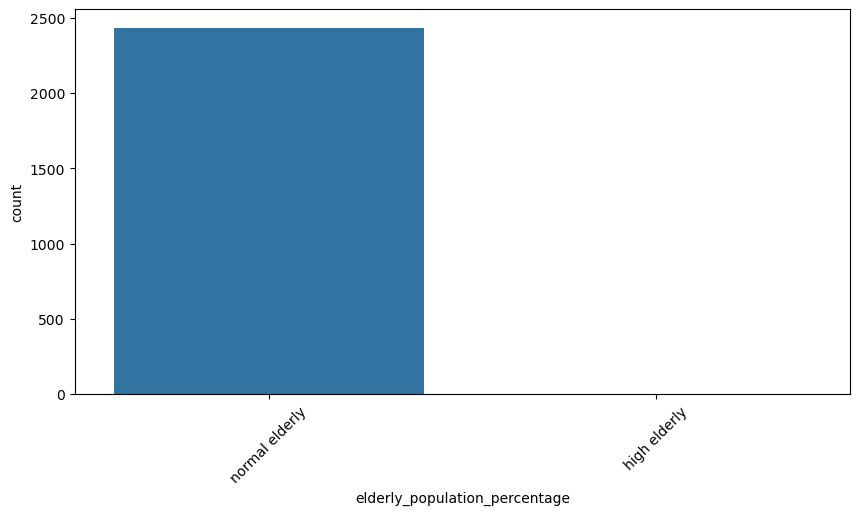

In [14]:
# visualize results
plt.figure(figsize=(10, 5))
chart = sns.countplot(data=covid, x='elderly_population_percentage')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

##### After determining the percentage of elderly people in each counties’ total population, the percentages seem to be low in a significant number of counties. There is no significant imbalance in the ages composing each county's population, and potential ageism in healthcare should not be a confounding variable in the results of the model.

## **Methods:**
##### We one-hot encoded the data to utilize in our kNN model, including the target variable since it has three possible values.
##### We decided that the kNN technique was best to build our prediction model with because kNN allows for a known target variable and is simple to build. Since the model is also easy to interpret and explain, the results can be easily explained to the CDC or hospital administrators who may not have much knowledge on machine learning. Since kNN is formed on memory-based learning, it makes no assumptions about the data (it is non-parametric) and is able to handle multi-class data. Although the model is sensitive to being influenced by skewed class distributions, it has strong predictive power and works quite well to generalize results to many types of data.

##### **Normalizing Numeric Variables**

In [15]:
numeric = covid.select_dtypes(include=['float64']).columns.tolist()
covid[numeric] = MinMaxScaler().fit_transform(covid[numeric])

##### **One-Hot Encoding**

In [16]:
# Drop Target Before One-Hot Encoding 
non_numeric = covid.select_dtypes(include=['object']).columns.tolist()
covid_1h = pd.get_dummies(covid, columns = non_numeric)

covid_1h.head()

,fips_code,Staffed All Beds,Licensed All Beds,Population,Population (20+),Population (65+),Staffed All Beds [Per 1000 People],Staffed All Beds [Per 1000 Adults (20+)],Staffed All Beds [Per 1000 Elderly (65+)],Licensed All Beds [Per 1000 People],...,County Name_Yolo,County Name_York,County Name_Young,County Name_Yuba,County Name_Yuma,All Bed Occupancy Rate_high occupancy,All Bed Occupancy Rate_low occupancy,All Bed Occupancy Rate_middle occupancy,elderly_population_percentage_high elderly,elderly_population_percentage_normal elderly
1,2020,0.042351,0.041934,0.028745,0.027768,0.023318,0.107856,0.114432,0.191953,0.040534,...,0,0,0,0,0,1,0,0,0,1
2,2050,0.001387,0.001350,0.001695,0.001332,0.000834,0.058585,0.075483,0.153107,0.020889,...,0,0,0,0,0,0,0,1,0,1
3,2070,0.000694,0.000657,0.000387,0.000313,0.000157,0.115848,0.137693,0.243631,0.037027,...,0,0,0,0,0,0,1,0,0,1
4,2090,0.006199,0.006387,0.009687,0.009354,0.007233,0.045342,0.048063,0.088398,0.018184,...,0,0,0,0,0,0,0,1,0,1
5,2110,0.001864,0.002664,0.003071,0.003088,0.002940,0.043228,0.043827,0.064296,0.023379,...,0,0,0,0,0,0,0,1,0,1


##### The numerical variables are now normalized in a scale from 0 to 1.0 and the categorical variables are converted to binary outcomes to facilitate the model’s performance.

##### **Check Prevelance** 
##### We understand that at random, there is a 21.9% chance of selecting a county with high bed occupancy rate.

In [17]:
print(covid_1h['All Bed Occupancy Rate_high occupancy'].value_counts(normalize=True))
print(covid_1h['All Bed Occupancy Rate_middle occupancy'].value_counts(normalize=True))
print(covid_1h['All Bed Occupancy Rate_low occupancy'].value_counts(normalize=True))

0    0.774631
1    0.225369
Name: All Bed Occupancy Rate_high occupancy, dtype: float64
1    0.505337
0    0.494663
Name: All Bed Occupancy Rate_middle occupancy, dtype: float64
0    0.730706
1    0.269294
Name: All Bed Occupancy Rate_low occupancy, dtype: float64


##### **Partition Using train_test_split**

In [18]:
X = covid_1h.drop(['All Bed Occupancy Rate_high occupancy'], axis=1).values
y = covid_1h['All Bed Occupancy Rate_high occupancy'].values 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, stratify = y, random_state=21)

##### **Create Tuning Set**

In [20]:
X_tune, X_test, y_tune, y_test = train_test_split(X_test,y_test,  train_size = 0.50, stratify = y_test,random_state=49)

## **Building the Model**
##### We built the kNN model using a random number of neighbors on the training set. After determining the optimal k value, we will utilize the prediction model again on the test set.

In [21]:
import random
random.seed(1984)

covid_KNN = KNeighborsClassifier(n_neighbors=9)
covid_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

## **Evaluation Metrics**

##### We evaluated the performance of the kNN model in order to optimize its performance before applying it to the test set. An overall prediction table was built to understand the probabilities calculated for the model’s prediction of each observation.

##### **Predictive Probability on the Test Set**

In [22]:
covid_prob1 = covid_KNN.predict_proba(X_tune)
print(covid_prob1[:5]) 

[[0.77777778 0.22222222]
 [0.88888889 0.11111111]
 [0.88888889 0.11111111]
 [0.88888889 0.11111111]
 [0.66666667 0.33333333]]


In [23]:
covid_pred1 = covid_KNN.predict(X_tune)
print(covid_pred1)

[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [24]:
final_model= pd.DataFrame({'neg_prob':covid_prob1[:, 0], 'pred':covid_pred1,'target':y_tune, 'pos_prob':covid_prob1[:, 1]})
print(final_model.head())

   neg_prob  pred  target  pos_prob
0  0.777778     0       0  0.222222
1  0.888889     0       1  0.111111
2  0.888889     0       0  0.111111
3  0.888889     0       0  0.111111
4  0.666667     0       0  0.333333


##### **Model's Accuracy** 

In [25]:
# test set

print(covid_KNN.score(X_test, y_test))

0.7827868852459017


In [26]:
# tuning set

print(covid_KNN.score(X_tune, y_tune))

0.7991803278688525


##### The accuracy value of 0.79 indicates that 79% of county healthcare systems were correctly classified as true positives (high bed occupancy) or true negatives (middle or low bed occupancy). This number indicates fairly good model performance. 

##### **Confusion Matrix**

[[181   8]
 [ 41  14]]


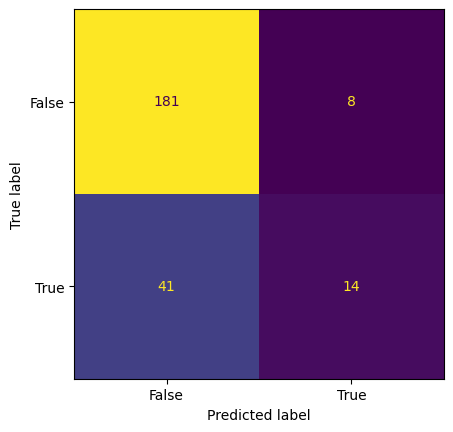

In [27]:
print(metrics.confusion_matrix(final_model.target,final_model.pred)) 
print(metrics.ConfusionMatrixDisplay.from_predictions(final_model.target,final_model.pred, display_labels = [False, True], colorbar=False))

In [28]:
print('True Positive Rate:', 181 / (181 + 41))
print('False Positive Rate:', 8 / (8 + 14))
print('Precision Value:', 181 / (181 + 8))


True Positive Rate: 0.8153153153153153
False Positive Rate: 0.36363636363636365
Precision Value: 0.9576719576719577


##### The confusion matrix indicates a True Positive Rate (same as sensitivity and recall rate) of 0.82, indicating that  82% of actual positive values were identified correctly. Additionally, the False Positive Rate is 0.36, indicating a low number of incorrectly predicted positive values. The precision rate of 0.96 indicates that 96% of true positives were identified correctly. The model shows more false negatives than false positives, which is worrisome because in the context of healthcare and severe disease cases, we would prefer to err to the more cautious side. 

In [29]:
print(final_model.target.value_counts())

0    189
1     55
Name: target, dtype: int64


##### **AUC and ROC Curve**

Text(0.5, 0, 'False Positive Rate')

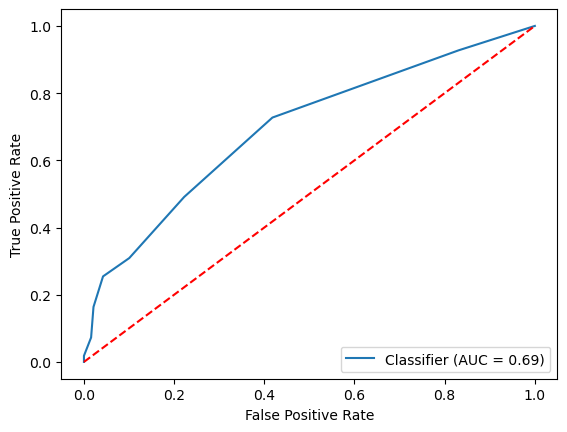

In [30]:
print(metrics.RocCurveDisplay.from_predictions(final_model.target, final_model.pos_prob))
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

##### As visualized in reference to the ROC curve, the AUC value of 0.69 is fairly good and indicates that the majority of the model is in the area under the ROC curve, therefore showing a fairly good performance measure from the kNN model.

##### **Log Loss**

In [31]:
print(metrics.log_loss(final_model.target, final_model.pos_prob))

1.0257607195000162


##### When the model makes some inaccurate predictions, the Log Loss value helps us understand how severely incorrect the predictions are. With a log loss value of 1.03, we feel safe in knowing that the model is fairly accurate, and even the incorrect predictions should not be too detrimental to the users.

## **Optimize the Model**

##### After evaluating the model’s accuracy, we determined the optimal k value and re-entered it into the code building the original model. Calculating the accuracy of possible k values on the test set, we determined that k = 9 was the best value. Although k = 15 has a greater accuracy than 9, it is on the edge of the range of possible values (18 since there are 17 variables). A value of 9 helps prevent the risk of overfitting with the data set and should be better for applying the model to other data in a general manner in the future.

In [32]:
def chooseK(k, x_train, y_train, x_test, y_test): # 5 parameters - y is target, x is features, need k size
    random.seed(1)
    print("calculating... ", k, "k")
    class_knn = KNeighborsClassifier(n_neighbors = k) # actual model / target
    class_knn.fit(x_train, y_train) # train and score
    
    # calculate accuracy
    accu = class_knn.score(x_test, y_test)
    return accu

In [33]:
test = pd.DataFrame({'k':list(range(1,18,2)), 
                     'accu':[chooseK(i, X_train, y_train, X_test, y_test) for i in list(range(1, 18, 2))]})


calculating...  1 k
calculating...  3 k
calculating...  5 k
calculating...  7 k
calculating...  9 k
calculating...  11 k
calculating...  13 k
calculating...  15 k
calculating...  17 k


In [34]:
test2 = test.sort_values(by=['accu'], ascending=False)
print(test2.head())

    k      accu
7  15  0.786885
4   9  0.782787
3   7  0.778689
5  11  0.778689
6  13  0.778689


##### **Find the Number of K that produces the Most Accurate Model**

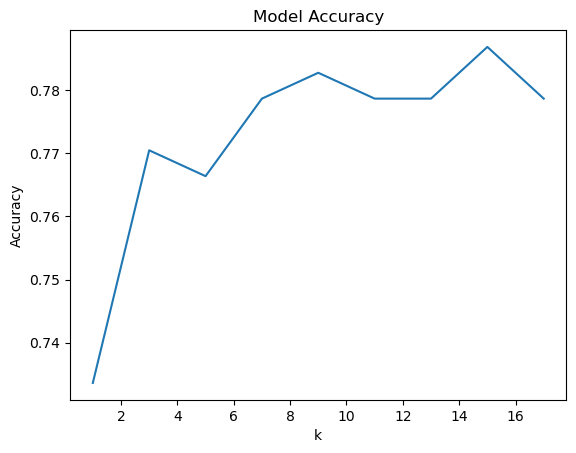

In [35]:
plt.plot(test['k'], test['accu'])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

In [36]:
test_probs = covid_KNN.predict_proba(X_test)
test_preds = covid_KNN.predict(X_test)

In [37]:
test_probabilities = pd.DataFrame(test_probs, columns = ['not_high_occupancy_prob', 'high_occupancy_prob'])
test_probabilities.head()

,not_high_occupancy_prob,high_occupancy_prob
0,1.000000,0.000000
1,0.777778,0.222222
2,0.888889,0.111111
3,0.555556,0.444444
4,0.888889,0.111111


In [38]:
final_model = pd.DataFrame({'actual_class': y_test.tolist(),
                           'pred_class': test_preds.tolist(),
                           'pred_prob': test_probabilities['high_occupancy_prob']})
final_model.head()

,actual_class,pred_class,pred_prob
0,0,0,0.000000
1,0,0,0.222222
2,0,0,0.111111
3,0,0,0.444444
4,0,0,0.111111


In [39]:
final_model.actual_class = final_model.actual_class.astype('category')
final_model.pred_class = final_model.pred_class.astype('category')

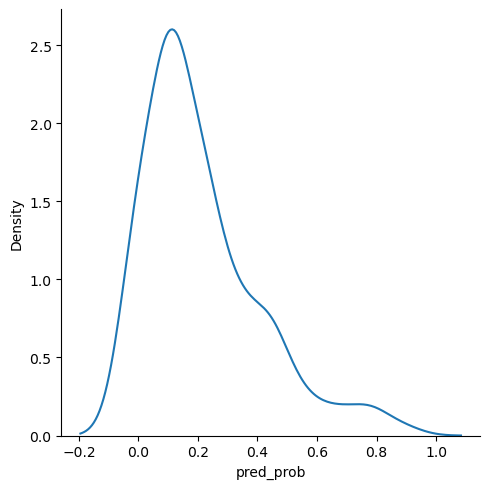

In [40]:
sns.displot(final_model, x="pred_prob", kind="kde")

In [41]:
print(final_model.pred_prob.value_counts())

0.111111    81
0.222222    49
0.000000    47
0.333333    24
0.444444    23
0.555556     7
0.777778     6
0.666667     5
0.888889     2
Name: pred_prob, dtype: int64


##### Using the test set, we created another table of the prediction probabilities determined by the kNN model. These values help us elucidate how confident the model was in each prediction made, as well as whether or not the model was correct in its prediction for each value. This information can be used to index back into the original dataset to determine which hospitals are more confidently under high bed occupancy conditions and therefore under more strain handling the pandemic.

##### **Adjusting Threshold**

##### We evaluated the model using different thresholds for the prediction probabilities to determine the ideal threshold in order to create the most accurate predictions possible. We found that the original model’s threshold of 50% showed the most accurate predictions (as visualized by the confusion matrix).

In [42]:
def adjust_thres(x, y, z):
    """
    x=pred_probabilities
    y=threshold
    z=tune_outcome
    """
    thres = pd.DataFrame({'new_preds': [1 if i > y else 0 for i in x]})
    thres.new_preds = thres.new_preds.astype('category')
    con_mat = metrics.confusion_matrix(z, thres)  
    print(con_mat)

##### **Adjusting Threshold to 88%**

In [43]:
adjust_thres(final_model.pred_prob, .88, final_model.actual_class)

[[187   2]
 [ 55   0]]


##### **Adjusting Threshold to 77%**

In [44]:
adjust_thres(final_model.pred_prob, .77, final_model.actual_class) 

[[185   4]
 [ 51   4]]


##### **Adjusting Threshold to 66%**

In [45]:
adjust_thres(final_model.pred_prob, .66, final_model.actual_class) 

[[183   6]
 [ 48   7]]


## **Conclusion and Future Work**

##### The kNN model was helpful in determining the predictions for the target variable in an easy to interpret manner, and the results of the model can be used to directly index into the data for the county healthcare systems with the highest probability of a high bed occupancy rate. We can interpret this as the model having a higher confidence in those counties having high bed occupancy. This information can be used to determine which counties need more financial and clinical support and could even be used for mitigation strategies in the future. Since the data was fairly simple and multi-class, the kNN model was best to answer our research question. 
##### Overall, I believe that the model showed a fairly good performance that would be useful in predicting which county hospital system would have a high bed occupancy during the COVID pandemic. We believe that the model would benefit from an increased accuracy, especially since this data is of serious importance to the health of the country. Skewed class distributions among the features in the dataset may be affecting the accuracy as well. However, we should remember that the machine learning model is only useful for predictions, not causation.
##### Additionally, we believe that the model’s performance and analysis would be improved if there were more features in the data set indicating information about the people that compose the populations of each county. This would have to not add too many features to the dataset (less than 25 total) so that the kNN model can still perform well without being hindered by too much complexity.

